# NanoFTIR spectrum quality control

## Load two reference spectra measured on Gold

(2048,)
60.28902265110559


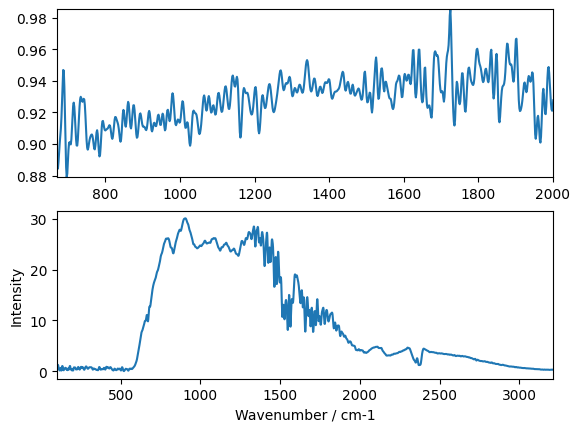

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
import NeaSpectra as neas

# Choose a measurement file
current_folder = os.getcwd()
file_name1 = r'E:\2024-02-14 102554 NF S Goldref1.txt'
file_name2 = r'E:\2024-02-14 103134 NF S Goldref2.txt'

s1 = neas.NeaSpectrum()
s1.readNeaSpectrum(file_name1)

s2 = neas.NeaSpectrum()
s2.readNeaSpectrum(file_name2)

print(np.shape(s1.data["O2A"]))
selfSpectrum = s1.data["O2A"]/s2.data["O2A"]

wnaxis = s1.data["Wavenumber"]
wnstart = 670
wnstop = 2000
wnstart_idx = np.argmin(abs(wnaxis-wnstart))
wnstop_idx = np.argmin(abs(wnaxis-wnstop))

SNR = np.mean(selfSpectrum[wnstart_idx:wnstop_idx])/np.std(selfSpectrum[wnstart_idx:wnstop_idx])

print(SNR)
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(wnaxis, selfSpectrum)
ax1.set_xlim([wnstart, wnstop])
ax1.set_ylim([min(selfSpectrum[wnstart_idx:wnstop_idx]), max(selfSpectrum[wnstart_idx:wnstop_idx])])
plt.ylabel("Intensity")
ax2.plot(wnaxis,s2.data["O2A"])
ax2.set_xlim([100, max(wnaxis)])
plt.xlabel("Wavenumber / cm-1")
plt.show()

In [2]:
s1.SaveSpectraToDAT("O2A")